In [1]:
# First, some imports:
import numpy as np
from darts.utils import timeseries_generation as tg

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

np.random.seed(42)


In [2]:

LENGTH = 3 * 365  # 3 years of daily data

# Melting: a sine with yearly periodicity and additive white noise
melting = (tg.sine_timeseries(length=LENGTH, 
                              value_frequency=(1/365), 
                              freq='D', 
                              column_name='melting')
           + 0.15 * tg.gaussian_timeseries(length=LENGTH, freq='D'))

# Rainfalls: a sine with bi-weekly periodicity and additive white noise
rainfalls = (tg.sine_timeseries(length=LENGTH, 
                                value_frequency=(1/14), 
                                freq='D', 
                                column_name='rainfall')
             + 0.3 * tg.gaussian_timeseries(length=LENGTH, freq='D'))

# We scale and shift the melting by 5 days; giving us the melting contribution
melting_contribution = 0.5 * melting.shift(5)

# We compute similar contribution from the rainfalls
all_contributions = [melting_contribution] + [0.1 * rainfalls.shift(lag) for lag in range(5)]

# We compute the final flow as the sum of everything,
# trimming series so they all have the same start time
flow = sum([series[melting_contribution.start_time():][:melting.end_time()]
            for series in all_contributions]).with_columns_renamed('melting', 'flow')

# add some white noise
flow += 0.1 * tg.gaussian_timeseries(length=len(flow))




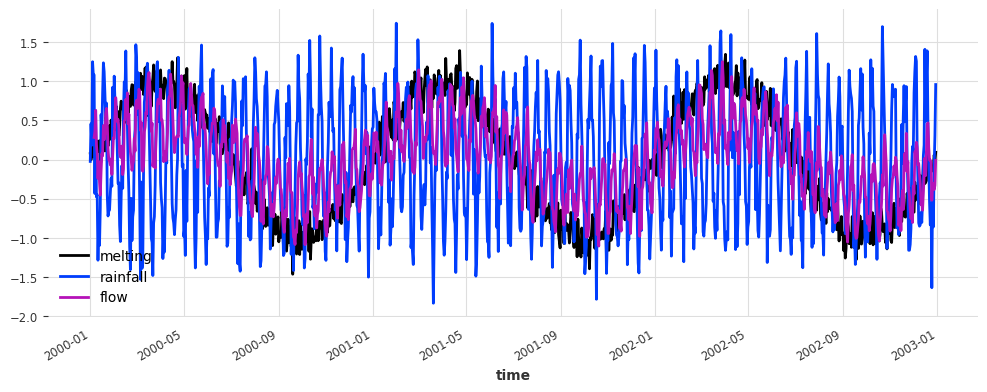

In [3]:
melting.plot()
rainfalls.plot()
flow.plot()

In [4]:
 from darts.metrics import rmse

# We first set aside the first 80% as training series:
flow_train, _ = flow.split_before(0.8)

def eval_model(model, past_covariates=None, future_covariates=None):
    # Past and future covariates are optional because they won't always be used in our tests
    
    # We backtest the model on the last 20% of the flow series, with a horizon of 10 steps:
    backtest = model.historical_forecasts(series=flow, 
                                          past_covariates=past_covariates,
                                          future_covariates=future_covariates,
                                          start=0.8, 
                                          retrain=False,
                                          verbose=True, 
                                          forecast_horizon=10)
    
    flow[-len(backtest)-100:].plot()
    backtest.plot(label='backtest (n=10)')
    print('Backtest RMSE = {}'.format(rmse(flow, backtest)))

2022-10-14 16:36:24 pytorch_lightning.utilities.rank_zero INFO: GPU available: True (cuda), used: False
2022-10-14 16:36:24 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-10-14 16:36:24 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-10-14 16:36:24 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
C:\Users\user\anaconda3\envs\darts_time_series\lib\site-packages\pytorch_lightning\trainer\trainer.py:1764: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
2022-10-14 16:36:24 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN         

Training: 0it [00:00, ?it/s]

2022-10-14 16:36:33 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=20` reached.


  0%|          | 0/210 [00:00<?, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Backtest RMSE = 0.17410247960929698


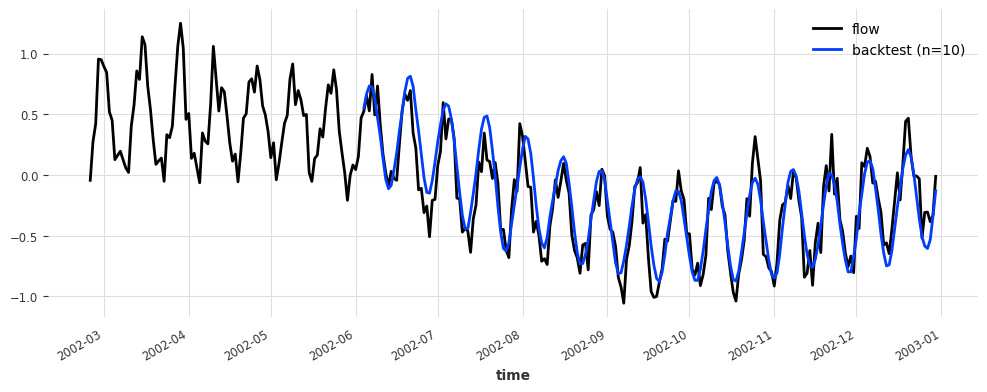

In [7]:
from darts.models import BlockRNNModel

brnn_no_cov = BlockRNNModel(input_chunk_length=30, 
                            output_chunk_length=10, 
                            n_rnn_layers=2)

brnn_no_cov.fit(flow_train, 
                epochs=20, 
                verbose=True)

eval_model(brnn_no_cov)


2022-10-14 16:38:25 pytorch_lightning.utilities.rank_zero INFO: GPU available: True (cuda), used: False
2022-10-14 16:38:25 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-10-14 16:38:25 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-10-14 16:38:25 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
C:\Users\user\anaconda3\envs\darts_time_series\lib\site-packages\pytorch_lightning\trainer\trainer.py:1764: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
2022-10-14 16:38:25 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN         

Training: 0it [00:00, ?it/s]

2022-10-14 16:39:10 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=100` reached.


  0%|          | 0/210 [00:00<?, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Backtest RMSE = 0.155921016385324


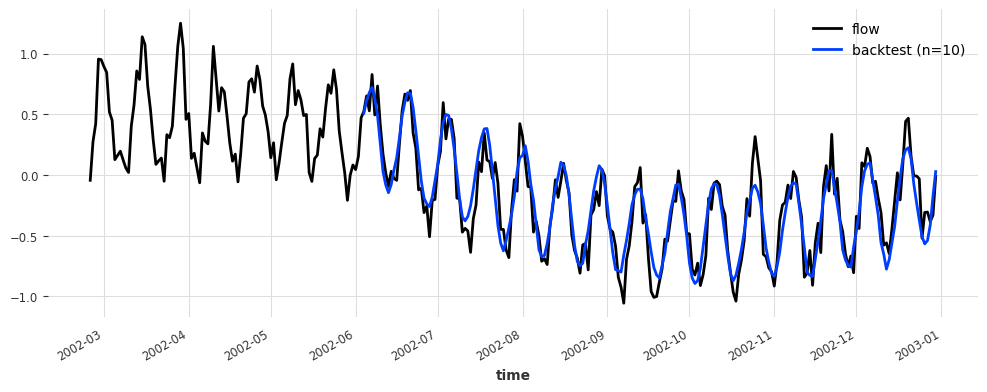

In [8]:
brnn_melting = BlockRNNModel(input_chunk_length=30, 
                             output_chunk_length=10, 
                             n_rnn_layers=2)

brnn_melting.fit(flow_train, 
                 past_covariates=melting, 
                 epochs=100, 
                 verbose=True)

eval_model(brnn_melting, 
           past_covariates=melting)

2022-10-14 16:40:00 pytorch_lightning.utilities.rank_zero INFO: GPU available: True (cuda), used: False
2022-10-14 16:40:00 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-10-14 16:40:00 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-10-14 16:40:00 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
C:\Users\user\anaconda3\envs\darts_time_series\lib\site-packages\pytorch_lightning\trainer\trainer.py:1764: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
2022-10-14 16:40:00 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN         

Training: 0it [00:00, ?it/s]

2022-10-14 16:40:45 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=100` reached.


  0%|          | 0/210 [00:00<?, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Predicting: 26it [00:00, ?it/s]

Backtest RMSE = 0.15908945149201567


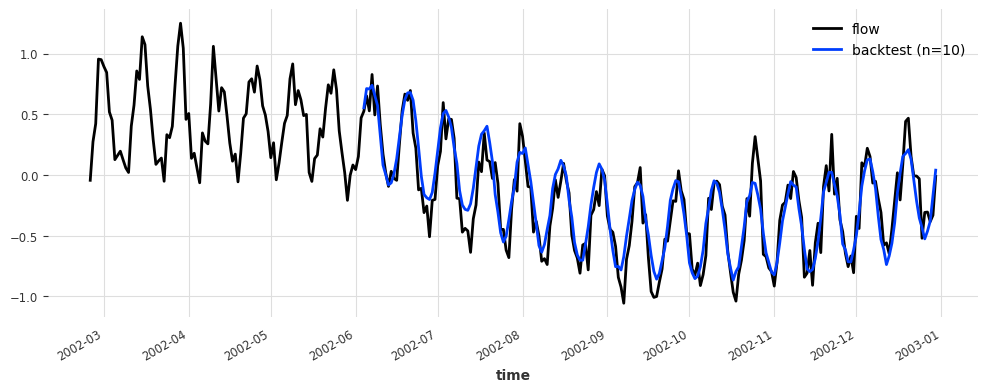

In [9]:
brnn_melting_and_rain = BlockRNNModel(input_chunk_length=30, 
                                      output_chunk_length=10, 
                                      n_rnn_layers=2)

brnn_melting_and_rain.fit(flow_train, 
                          past_covariates=melting.stack(rainfalls), 
                          epochs=100, 
                          verbose=True)

eval_model(brnn_melting_and_rain, 
           past_covariates=melting.stack(rainfalls))